<a href="https://colab.research.google.com/github/frogbysachs/LASA-Data-Science/blob/Unit-2/Unit2Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


# Context
In this project I'll be analyzing the data behind diving- the sport where you do fancy flips off of a diving board and land cleanly in the water. Ideally, this entry into the water will be vertical, meaning the diver looks like they're doing a perfect handstand as they enter; a very non-vertical entry might look closer to a bellyflop or backflop.

I've taken data about all the dives I performed from my practice on Tuesday. My prior assumption is that while I'm in practice, I'm playing around with dives, so my rate of vertical entry will be lower than it would be in competition- I'll say **out of 10 dives, 2 will be vertical and 8 won't.**

So here's what a beta distribution of my prior looks like:

<Axes: >

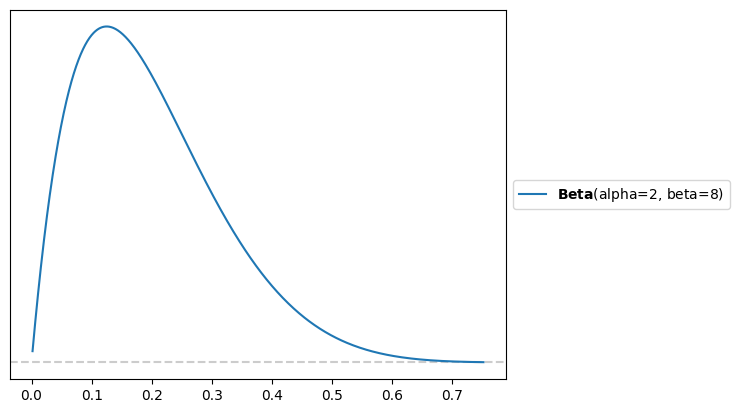

In [2]:
pz.Beta(alpha=2,beta=8).plot_pdf()

#Data I Collected
It turns out there are actually three possible outcomes for the entry of a dive: either it can be *short* (underrotate slightly), *vertical*, or *over* (overrotate slightly). For the purposes of this project, I'll be dividing my data into vertical vs. not vertical, so the latter category will be the sum of dives that were *short* and dives that were *over*.

On Tuesday, I had time for 31 dives while I was at practice. 10 dives were short, 2 dives were vertical, and 19 dives were over- so I'll combine this data to be 2 that were vertical and 29 that were not vertical. I'll now plot this data as a binomial distribution, calling that my **likelihood**.

<Axes: >

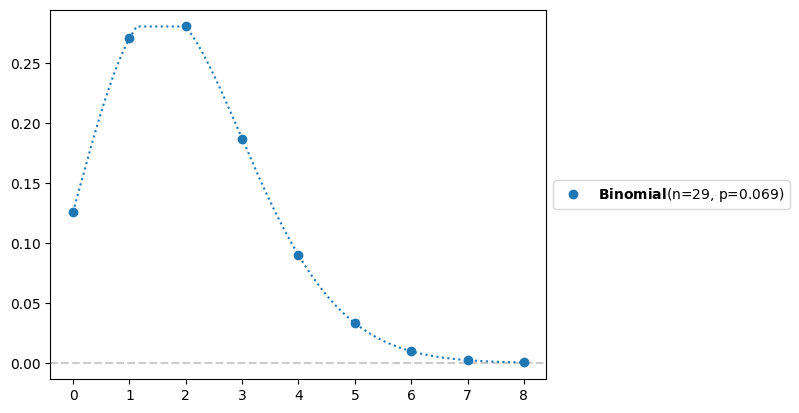

In [3]:
pz.Binomial(n = 29, p = 2/29 ).plot_pdf()

#Updated prediction
From here, I want to combine my prior and the data I collected in a beta distribution to have a more accurate, updated prediction for how I might dive in practice in the future.

<Axes: >

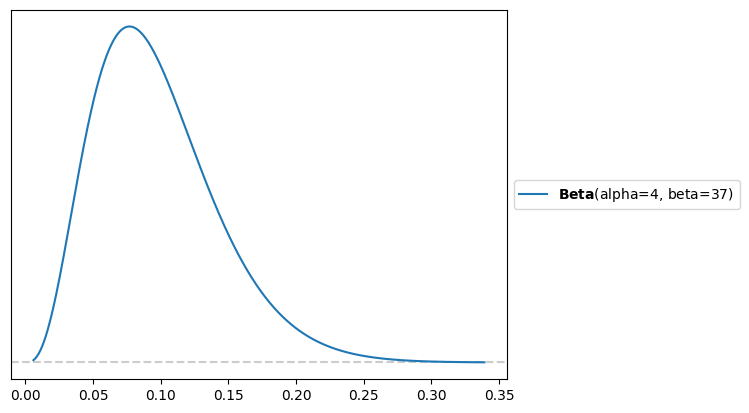

In [4]:
analysis_vert = pz.Beta(alpha = 2 + 2, beta = 8 + 29 )

analysis_vert.plot_pdf()

And below is a graph of my future predictions: based on the information that I've collected so far, this Bernoulli model graph gives predictions for how my next 1000 dives will go.

<Axes: title={'center': 'θ'}>

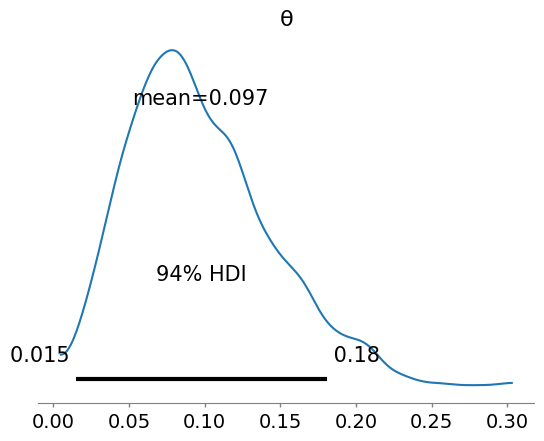

In [12]:
vert_data = np.repeat([1,0], repeats = [2,29])
with pm.Model() as vert_model:
  θ = pm.Beta('θ' , alpha = 2. , beta = 8.)
  y = pm.Bernoulli('y', p = θ, observed = vert_data)
  idata_vert = pm.sample(1000)

az.plot_posterior(idata_vert)

#Commentary
So my new predictive model is giving me a solid mean 9.7-9.9% rate of vertical entry for my next thousand dives (this varies each time I run the above lines of code). Not so bad at all, given that my actual rate of vertical entry at practice on Tuesday was 2/29 = 6.9%.

It's interesting that this model gives a mean that is 1.4x higher than the original percentage from my collected data, but that gives me some valuable insight into how important the prior actually is in determining the predictive posterior.

**The end :D**